In [1]:
import pandas as pd
import sklearn
import sklearn.datasets

In [2]:
data = sklearn.datasets.load_iris(as_frame=True)

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print(data['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,12)

In [8]:
df = data['frame']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
N = len(data['feature_names'])
M = len(df)
L = len(data['target_names'])
(N,M), L

((4, 150), 3)

In [10]:
'hi'

'hi'

In [19]:
def scatterMatrix(dataFrame, labelColumn):
    ''''
    Makes a so-called matrix scatter using data from dataFrame. 
    Uses the labelColumn as label and plots each category with different 
    colors/markers. 
    
    Category aware compared to pandas function. 
    
    Assumes labels are integers 0, L-1, where L is the number of unique labels
    inferred from the dataFrame[labelColumn].
    
    Assumes labelColumn is the last column to be included in scatter, preceeding 
    columns must be numeric. 
    
    Supports only first 5 numeric columns.
    '''
    N = list(dataFrame.columns).index(labelColumn) - 1
    fig, axs = plt.subplots(N,N)

    colors = ['C0','C1','C2','C4','C5']
    markers = ['x','o','+','-','.']
    
    #Number of labels
    L = len(dataFrame.loc[:,labelColumn].unique())
    
    
    #Do scatter on non diagonal axes
    for i in range(N):
        for j in range(N):
            if i == j: ## skip diagonals
                continue
            for label in range(L):
                #grab data 
                x, y = dataFrame.query(f'{labelColumn} == {label}').iloc[:,[i,j]].values.T
                #do acutal plot 
                axs[i,j].plot(x, y, marker = markers[label], color=colors[label], ls="None", alpha=0.5)

    #Do histograms on diagonal.
    for i in range(N):
        for label in range(L):
            x = dataFrame.query(f'{labelColumn} == {label}').iloc[:,i].values.T
            axs[i,i].hist(x,bins='auto', alpha=0.5, color=colors[label])
        
    return fig, axs

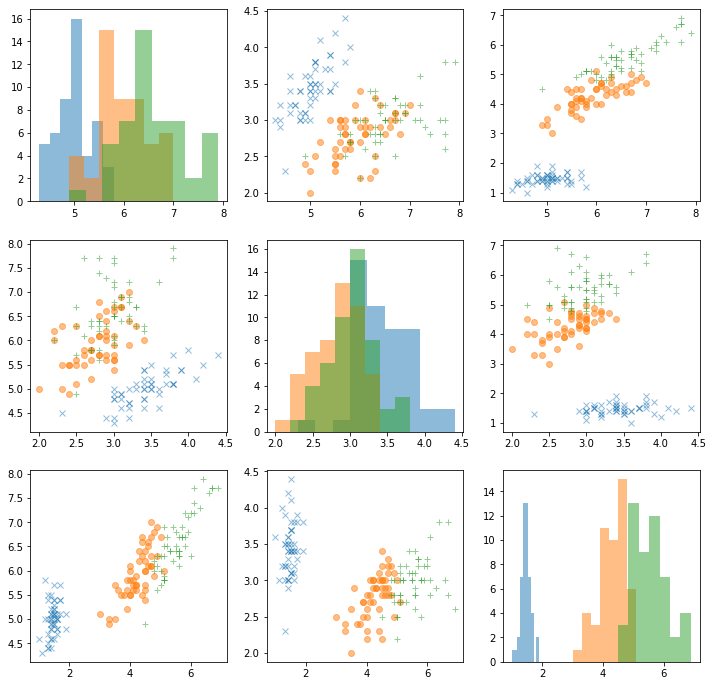

In [20]:
fig, axs = scatterMatrix(df, 'target')